In [3]:
from langgraph.graph import StateGraph, MessagesState, START, END
from langchain_openai import ChatOpenAI
from langgraph.prebuilt import ToolNode
from langchain_community.tools import TavilySearchResults
from IPython.display import Image

In [ ]:
from dotenv import load_dotenv
import os

load_dotenv()
os.environ.get('OPENAI_API_KEY')

In [5]:
llm = ChatOpenAI(model='gpt-4o-mini', temperature=0)

In [6]:
def should_continue(state: MessagesState) -> bool:
    messages = state['messages']
    last_message = messages[-1]
    if last_message.tool_calls:
        return 'tools'
    else:
        return END



In [7]:
def call_model(state: MessagesState):
    messages  = state['messages']
    response = llm.invoke(messages)
    
    return {'messages': messages + [response]}

In [8]:
graph = StateGraph(MessagesState)

In [9]:
graph.add_node('agent', call_model)

In [10]:
search_tool = TavilySearchResults(max_results=5)

In [11]:
tools = [search_tool]

tool_node = ToolNode(tools)

graph.add_node('tools', tool_node)

In [12]:
# This means that the first node is the agent
# similar to setting graph.set_entry_point('agent')
graph.add_edge(START, "agent")

In [13]:
graph.add_conditional_edges('agent', should_continue)

In [14]:
graph.add_edge('tools', 'agent')

In [15]:
graph_compiled = graph.compile()

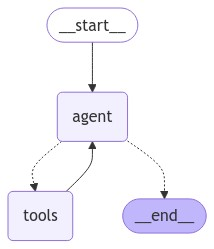

In [16]:
Image(graph_compiled.get_graph().draw_mermaid_png())

In [17]:
output = graph_compiled.invoke({'messages': [
    ('user', 'Write a simple report on how to use AI for productivity.')
]})

output

{'messages': [HumanMessage(content='Write a simple report on how to use AI for productivity.', additional_kwargs={}, response_metadata={}, id='e18fa745-98c0-472c-9ca6-ae7df53aa32e'),
  AIMessage(content='# Report on Using AI for Productivity\n\n## Introduction\nArtificial Intelligence (AI) has emerged as a transformative tool in various sectors, enhancing productivity and efficiency. This report outlines practical ways to leverage AI for improving productivity in personal and professional settings.\n\n## 1. Task Automation\nAI can automate repetitive tasks, allowing individuals and teams to focus on more strategic activities. Common applications include:\n\n- **Email Management**: AI tools can sort, prioritize, and respond to emails, reducing the time spent on inbox management.\n- **Scheduling**: AI-powered scheduling assistants can coordinate meetings by finding suitable times for all participants, eliminating back-and-forth communication.\n\n## 2. Data Analysis\nAI excels at processi

In [18]:
from IPython.display import Markdown

Markdown(output['messages'][-1].content)

# Report on Using AI for Productivity

## Introduction
Artificial Intelligence (AI) has emerged as a transformative tool in various sectors, enhancing productivity and efficiency. This report outlines practical ways to leverage AI for improving productivity in personal and professional settings.

## 1. Task Automation
AI can automate repetitive tasks, allowing individuals and teams to focus on more strategic activities. Common applications include:

- **Email Management**: AI tools can sort, prioritize, and respond to emails, reducing the time spent on inbox management.
- **Scheduling**: AI-powered scheduling assistants can coordinate meetings by finding suitable times for all participants, eliminating back-and-forth communication.

## 2. Data Analysis
AI excels at processing and analyzing large datasets quickly. This capability can be utilized in various ways:

- **Business Intelligence**: AI tools can analyze sales data, customer behavior, and market trends to provide actionable insights, helping businesses make informed decisions.
- **Predictive Analytics**: AI can forecast future trends based on historical data, enabling proactive planning and resource allocation.

## 3. Enhanced Communication
AI can improve communication within teams and with clients:

- **Chatbots**: Implementing AI chatbots on websites or customer service platforms can provide instant responses to common inquiries, improving customer satisfaction and freeing up human agents for complex issues.
- **Language Translation**: AI translation tools can facilitate communication in multilingual environments, making it easier to collaborate with international teams.

## 4. Personal Productivity Tools
AI-driven personal productivity applications can help individuals manage their time and tasks more effectively:

- **Smart To-Do Lists**: AI can prioritize tasks based on deadlines, importance, and user behavior, ensuring that critical tasks are completed on time.
- **Focus Assistants**: AI tools can analyze work patterns and suggest optimal times for focused work, minimizing distractions and enhancing concentration.

## 5. Learning and Development
AI can support continuous learning and skill development:

- **Personalized Learning**: AI platforms can tailor educational content to individual learning styles and paces, making training more effective.
- **Skill Assessment**: AI can evaluate skills and recommend resources for improvement, helping employees stay relevant in a rapidly changing job market.

## Conclusion
Integrating AI into daily workflows can significantly enhance productivity by automating tasks, improving data analysis, facilitating communication, and supporting personal development. As AI technology continues to evolve, its potential to drive efficiency and effectiveness in various domains will only increase. Organizations and individuals should explore and adopt AI tools that align with their specific needs to maximize productivity gains.

## Recommendations
- **Identify Repetitive Tasks**: Assess daily activities to identify tasks that can be automated using AI.
- **Invest in AI Tools**: Research and invest in AI applications that suit your personal or organizational needs.
- **Train Employees**: Provide training on how to effectively use AI tools to ensure maximum benefit.
- **Monitor and Adjust**: Regularly evaluate the impact of AI on productivity and make adjustments as necessary to optimize performance.